<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/12_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install whit_phys_util

In [48]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import whit_phys_util as buc

In [49]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Repository exists at this location. Pulling changes from GitHub.


$$
\ddot\phi + 2\beta\dot\phi +\omega_0^2\sin\phi = \gamma\omega_0^2\cos\omega t
$$

In [50]:
#given params 
gam = 1.3
omega = 2*np.pi
omega_0 = 1.5*omega
beta = omega_0/4 

phi0_1 = [0,0]
phi0_2 = [1,0]

In [51]:
def dwdt(t,w):
  phi = w[0]
  phi_dot = w[1]
  phi_ddot = -2*beta*phi_dot - omega_0**2*np.sin(phi) + gam*omega_0**2*np.cos(omega*t)
  return[phi_dot, phi_ddot] 

In [52]:
t = np.linspace(0,8,500)
tspan = [0,8]

In [53]:
sol1 = solve_ivp(dwdt,tspan,phi0_1,t_eval=t,rtol = 1e-12)
sol2 = solve_ivp(dwdt,tspan,phi0_2,t_eval=t,rtol = 1e-12)
dphi = np.log10(abs(sol2.y[0] - sol1.y[0]))

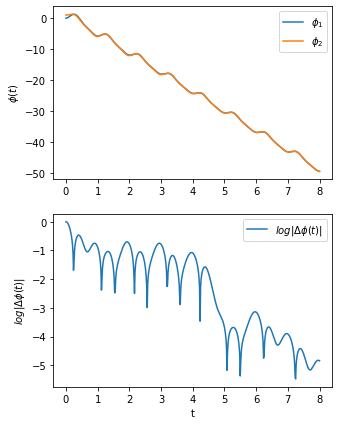

In [58]:
fig, ax = plt.subplots(2, figsize=(5,7))
ax[0].plot(sol1.t,sol1.y[0],label='$\phi_1$')
ax[0].plot(sol1.t,sol2.y[0],label='$\phi_2$')
ax[0].set_ylabel('$\phi(t)$');
ax[1].plot(sol1.t,dphi, label='$log|\Delta\phi(t)|$')
ax[1].set_ylabel('$log|\Delta\phi(t)|$');
ax[1].set_xlabel('t')
ax[0].legend()
ax[1].legend();

We can see that because of the strict agreement of the upper plot that there is no chaotic behavior, however this doesn't necessarily tell the whole story. The second plot examines this relationship between the two solutions closer, by plotting the log of the difference. because of how the crests of the graph decrease linearly, that shows that the difference between the two solutions decreases exponentially. 